In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
df = pd.read_csv('games_dataset.csv')

In [4]:
df.head()

,Game Name,Genre,Platform,Release Year,User Rating
0,Sekiro: Shadows Die Twice,Sports,Nintendo Switch,2014,9.654719
1,Control,Puzzle,Nintendo Switch,2000,3.457386
2,Among Us,Strategy,Nintendo Switch,2007,5.367622
3,Call of Duty: Modern Warfare,Stealth,PlayStation,2005,1.240325
4,League of Legends,Simulation,PC,2021,3.535476


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Game Name     5000 non-null   object 
 1   Genre         5000 non-null   object 
 2   Platform      5000 non-null   object 
 3   Release Year  5000 non-null   int64  
 4   User Rating   5000 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 195.4+ KB


In [6]:
df.describe()

,Release Year,User Rating
count,5000.000000,5000.000000
mean,2011.375400,5.524913
std,6.943984,2.598429
min,2000.000000,1.005878
25%,2005.000000,3.260596
50%,2011.000000,5.574233
75%,2017.000000,7.802727
max,2023.000000,9.996196


In [7]:
df.isnull().sum()

Game Name       0
Genre           0
Platform        0
Release Year    0
User Rating     0
dtype: int64

In [8]:
df.shape

(5000, 5)

In [9]:
df.duplicated().sum()

0

In [16]:
df.isnull().sum()

Game Name       0
Genre           0
Platform        0
Release Year    0
User Rating     0
dtype: int64

In [17]:
df.shape

(5000, 5)

In [18]:
df.duplicated().sum()

0

In [19]:
print(df['Release Year'].value_counts())

Release Year
2011    238
2010    231
2000    220
2016    219
2005    219
2023    218
2001    217
2006    216
2002    215
2021    215
2008    212
2018    211
2003    210
2014    207
2020    203
2007    201
2009    198
2004    198
2015    198
2012    196
2019    194
2022    191
2017    189
2013    184
Name: count, dtype: int64


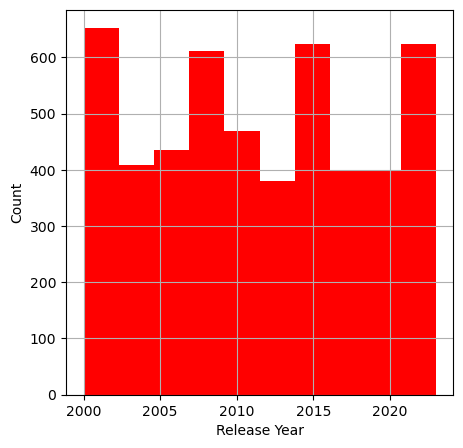

In [20]:
df['Release Year'].hist(color = 'red',figsize=(5,5))
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

C:\Users\seife\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\seife\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\seife\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\seife\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

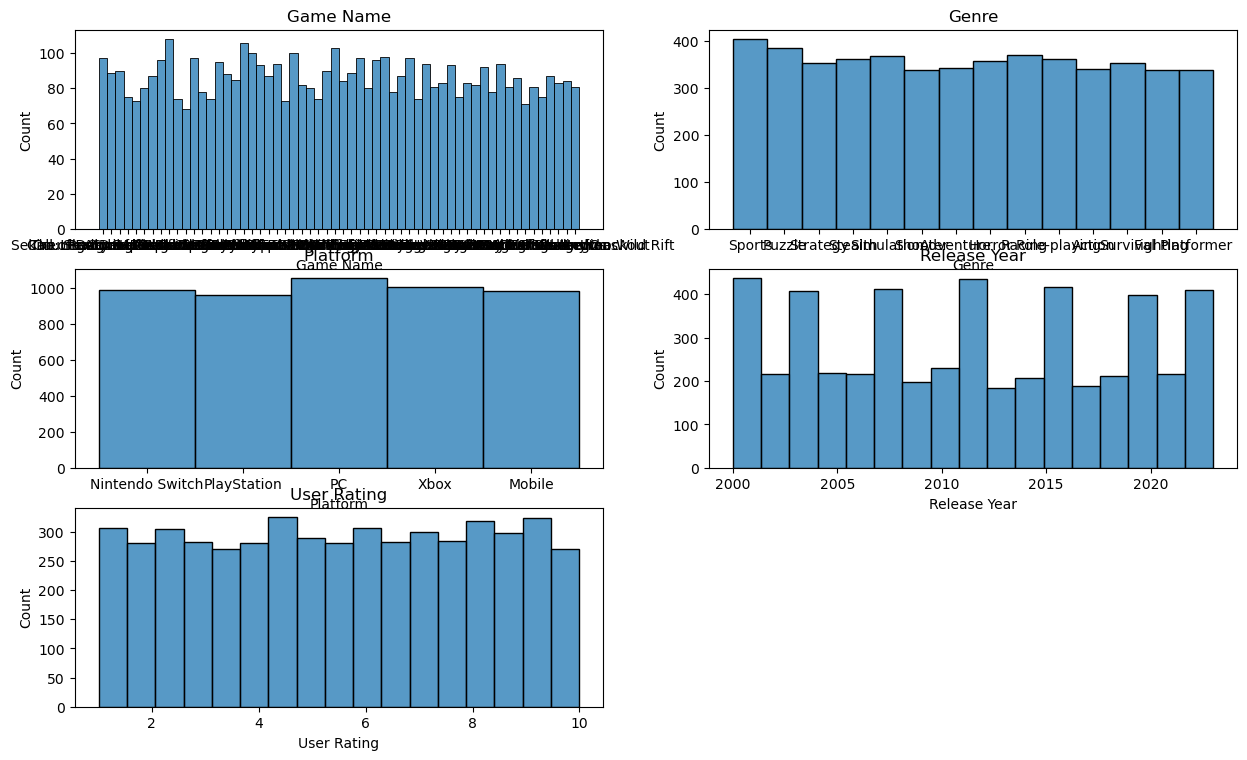

In [21]:
features = df.columns.tolist()
figure  = plt.figure(figsize=(15,len(features)*3))
for id,feature in enumerate(features):
  plt.subplot(len(features),2,id+1)
  sns.histplot(df[feature])
  plt.title(feature)

plt.show()

In [23]:
#converting genre to numeric values 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Genre'] = le.fit_transform(df['Genre'])
print(df['Genre'].unique())
genre_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(genre_mapping)

[10  5 12 11  9  8  1  3  6  7  0 13  2  4]
{'Action': 0, 'Adventure': 1, 'Fighting': 2, 'Horror': 3, 'Platformer': 4, 'Puzzle': 5, 'Racing': 6, 'Role-playing': 7, 'Shooter': 8, 'Simulation': 9, 'Sports': 10, 'Stealth': 11, 'Strategy': 12, 'Survival': 13}


In [24]:
df.head(5)

,Game Name,Genre,Platform,Release Year,User Rating
0,Sekiro: Shadows Die Twice,10,Nintendo Switch,2014,9.654719
1,Control,5,Nintendo Switch,2000,3.457386
2,Among Us,12,Nintendo Switch,2007,5.367622
3,Call of Duty: Modern Warfare,11,PlayStation,2005,1.240325
4,League of Legends,9,PC,2021,3.535476


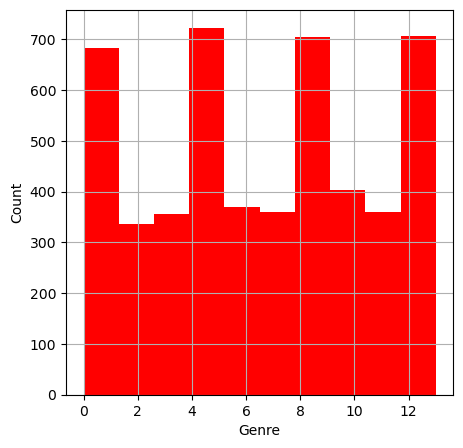

In [25]:
df['Genre'].hist(color = 'red',figsize=(5,5)) #show all nums from 1 to 12 
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

In [27]:
#convert platfrom no numeric values and show its map 
df['Platform'] = le.fit_transform(df['Platform'])
print(df['Platform'].unique())
platform_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(platform_mapping)

[1 3 2 4 0]
{'Mobile': 0, 'Nintendo Switch': 1, 'PC': 2, 'PlayStation': 3, 'Xbox': 4}


In [28]:
df.head()

,Game Name,Genre,Platform,Release Year,User Rating
0,Sekiro: Shadows Die Twice,10,1,2014,9.654719
1,Control,5,1,2000,3.457386
2,Among Us,12,1,2007,5.367622
3,Call of Duty: Modern Warfare,11,3,2005,1.240325
4,League of Legends,9,2,2021,3.535476


# questions : 
1)which platform the most number of games ? 

2)which category of games (genre) has the most high rates ?

3)Genre Popularity: Which genre of games tends to receive the highest user ratings? Are there any genres that consistently perform better or worse than others?

4)in which year has the most released games ?

5)Release Year Impact: Is there a correlation between the release year of a game and its user rating? Do newer games generally receive higher ratings than older games?

6)Top-Rated Games: What are the top 10 highest-rated games in the dataset? What genres and platforms do these top-rated games belong to?

7)Genre and Platform Interaction: How do different genres perform on various platforms? For example, are strategy games rated higher on PC compared to consoles?

8)Outlier Analysis: Are there any games with significantly higher or lower ratings than the average? What characteristics do these outliers have in terms of genre, platform, and release year?

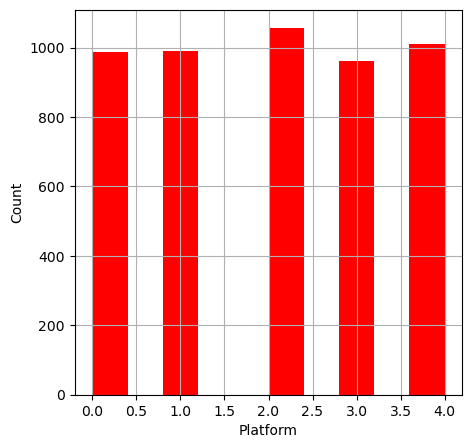

In [31]:
#1)which platform the most number of games ?
df['Platform'].hist(color = 'red',figsize=(5,5)) 
plt.xlabel('Platform')
plt.ylabel('Count')
plt.show()

platfrom 2 which is "pc" has more games than other platforms

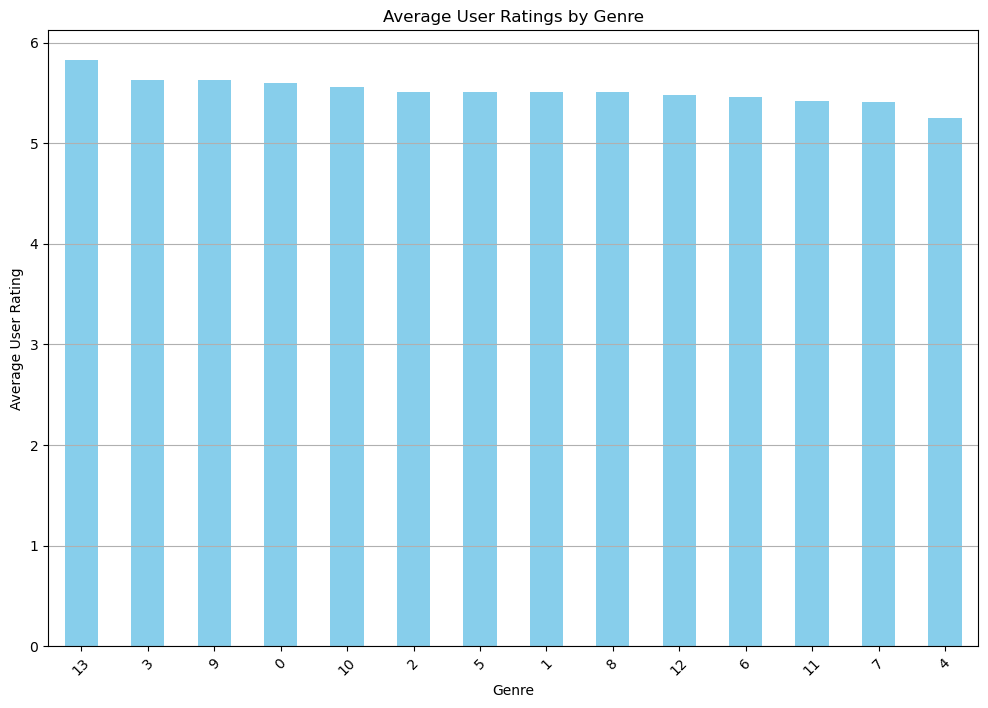

In [34]:
#2)Trends Over Time: How have user ratings for games evolved over the years? Are there any noticeable trends in ratings over time?

# Calculate the average user rating for each genre
genre_avg_ratings = df.groupby('Genre')['User Rating'].mean().sort_values(ascending=False)

# Plot the histogram
plt.figure(figsize=(12, 8))
genre_avg_ratings.plot(kind='bar', color='skyblue')
plt.title('Average User Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Average User Rating')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Display the plot
plt.show()

the highst category (genre) is 13 which is "survival"